# This INCREDIBLE trick will speed up your data processes.

https://www.youtube.com/watch?v=u4rsA5ZiTls <br> CSV/Pickle/Feather/Parquet/Other Options/Benchmarking 

In [1]:
import pandas as pd
import numpy as np

## Create our dataset

In [2]:
def get_dataset(size):
    # Create Fake Dataset
    df = pd.DataFrame()
    df['size'] = np.random.choice(['big', 'medium', 'small'], size)
    df['age'] = np.random.randint(1, 50, size)
    df['team'] = np.random.choice(['red', 'blue', 'yellow', 'green'], size)
    df['win'] = np.random.choice(['yes', 'no'], size)
    dates = pd.date_range('2020-01-01', '2022-12-31')
    df['date'] = np.random.choice(dates, size)
    df['prob'] = np.random.uniform(0, 1, size)
    return df


In [3]:
def set_dtypes(df):
    """
    Setting and casting the different columns to specific
    d-types.
    (Helps make our data frame memory efficient)

    """
    df['size'] = df['size'].astype('category')
    df['team'] = df['team'].astype('category')
    df['age'] = df['age'].astype('int16')
    df['win'] = df['win'].map({'yes': True, 'no': False})
    df['prob'] = df['prob'].astype('float32')
    return df


In [5]:
df = get_dataset(1_000_000)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype         
---  ------  --------------    -----         
 0   size    1000000 non-null  object        
 1   age     1000000 non-null  int32         
 2   team    1000000 non-null  object        
 3   win     1000000 non-null  object        
 4   date    1000000 non-null  datetime64[ns]
 5   prob    1000000 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int32(1), object(3)
memory usage: 42.0+ MB


## CSV

In [7]:
%%time
df = get_dataset(1_000_000)
df.to_csv("../output/nb_7_test_csv.csv", index=False)

CPU times: total: 5.12 s
Wall time: 5.22 s


In [8]:
%%time
df = pd.read_csv("../output/nb_7_test_csv.csv")

CPU times: total: 500 ms
Wall time: 487 ms


We are concerned with...
- who's going to be reading this file?
- csv if it's for someone who needs to open in excel.
- csv are not most ideal for efficiency and reduced disk space.


In [12]:
%%time
df = get_dataset(1_000_000)
df = set_dtypes(df)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype         
---  ------  --------------    -----         
 0   size    1000000 non-null  category      
 1   age     1000000 non-null  int16         
 2   team    1000000 non-null  category      
 3   win     1000000 non-null  bool          
 4   date    1000000 non-null  datetime64[ns]
 5   prob    1000000 non-null  float32       
dtypes: bool(1), category(2), datetime64[ns](1), float32(1), int16(1)
memory usage: 16.2 MB
CPU times: total: 547 ms
Wall time: 542 ms


In [13]:
df.to_csv("../output/nb_7_test_csv_2.csv", index=False)
df = pd.read_csv("../output/nb_7_test_csv_2.csv")

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype  
---  ------  --------------    -----  
 0   size    1000000 non-null  object 
 1   age     1000000 non-null  int64  
 2   team    1000000 non-null  object 
 3   win     1000000 non-null  bool   
 4   date    1000000 non-null  object 
 5   prob    1000000 non-null  float64
dtypes: bool(1), float64(1), int64(1), object(3)
memory usage: 39.1+ MB


In [19]:
df = pd.read_csv("../output/nb_7_test_csv_2.csv", 
                dtype={
                    'size':'category',
                    'age':'int16',
                    'team':'category',})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype   
---  ------  --------------    -----   
 0   size    1000000 non-null  category
 1   age     1000000 non-null  int16   
 2   team    1000000 non-null  category
 3   win     1000000 non-null  bool    
 4   date    1000000 non-null  object  
 5   prob    1000000 non-null  float64 
dtypes: bool(1), category(2), float64(1), int16(1), object(1)
memory usage: 20.0+ MB


## Pickle

In [38]:
df = get_dataset(1_000_000)
df = set_dtypes(df)
%time df.to_pickle('../output/nb_7_test.pickle')
%time df_pickle = pd.read_pickle('../output/nb_7_test.pickle')

CPU times: total: 15.6 ms
Wall time: 10.5 ms
CPU times: total: 0 ns
Wall time: 12.1 ms


In [39]:
df_pickle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype         
---  ------  --------------    -----         
 0   size    1000000 non-null  category      
 1   age     1000000 non-null  int16         
 2   team    1000000 non-null  category      
 3   win     1000000 non-null  bool          
 4   date    1000000 non-null  datetime64[ns]
 5   prob    1000000 non-null  float32       
dtypes: bool(1), category(2), datetime64[ns](1), float32(1), int16(1)
memory usage: 16.2 MB


# Parquet
```
    !pip install pyarrow
    !pip install fastparquet
```

In [40]:
df = get_dataset(1_000_000)
df = set_dtypes(df)
%time df.to_parquet("../output/nb_7_test.parquet")
%time df_parquet = pd.read_parquet("../output/nb_7_test.parquet")

CPU times: total: 93.8 ms
Wall time: 101 ms
CPU times: total: 46.9 ms
Wall time: 30.3 ms


In [41]:
df_parquet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype         
---  ------  --------------    -----         
 0   size    1000000 non-null  category      
 1   age     1000000 non-null  int16         
 2   team    1000000 non-null  category      
 3   win     1000000 non-null  bool          
 4   date    1000000 non-null  datetime64[ns]
 5   prob    1000000 non-null  float32       
dtypes: bool(1), category(2), datetime64[ns](1), float32(1), int16(1)
memory usage: 16.2 MB


## Feather

In [37]:
df = get_dataset(1_000_000)
df = set_dtypes(df)
%time df.to_feather("../output/nb_7_test.feather")
%time df_feather = pd.read_feather("../output/nb_7_test.feather")

CPU times: total: 78.1 ms
Wall time: 26.6 ms
CPU times: total: 31.2 ms
Wall time: 23.7 ms


In [42]:
df_feather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype         
---  ------  --------------    -----         
 0   size    1000000 non-null  category      
 1   age     1000000 non-null  int16         
 2   team    1000000 non-null  category      
 3   win     1000000 non-null  bool          
 4   date    1000000 non-null  datetime64[ns]
 5   prob    1000000 non-null  float32       
dtypes: bool(1), category(2), datetime64[ns](1), float32(1), int16(1)
memory usage: 16.2 MB


## CSV vs Pickle vs Parquet vs Feather

In [50]:
print("Reading and writing CSV")
df = get_dataset(5_000_000)
df = set_dtypes(df)
%time df.to_csv("../output/nb_7_test_csv_2.csv", index=False)
%time df = pd.read_csv("../output/nb_7_test_csv_2.csv")

Reading and writing CSV
CPU times: total: 23.6 s
Wall time: 23.8 s
CPU times: total: 1.8 s
Wall time: 1.8 s


In [51]:
print("Reading and writing Pickle")
df = get_dataset(5_000_000)
df = set_dtypes(df)
%time df.to_pickle('../output/nb_7_test.pickle')
%time df_pickle = pd.read_pickle('../output/nb_7_test.pickle')

Reading and writing Pickle
CPU times: total: 31.2 ms
Wall time: 48.2 ms
CPU times: total: 31.2 ms
Wall time: 43 ms


In [52]:
print("Reading and writing Parquet")
df = get_dataset(5_000_000)
df = set_dtypes(df)
%time df.to_parquet("../output/nb_7_test.parquet")
%time df_parquet = pd.read_parquet("../output/nb_7_test.parquet")

Reading and writing Parquet
CPU times: total: 500 ms
Wall time: 426 ms
CPU times: total: 359 ms
Wall time: 132 ms


In [53]:
print("Reading and writing Feather")
df = get_dataset(5_000_000)
df = set_dtypes(df)
%time df.to_feather("../output/nb_7_test.feather")
%time df_feather = pd.read_feather("../output/nb_7_test.feather")


Reading and writing Feather
CPU times: total: 203 ms
Wall time: 119 ms
CPU times: total: 93.8 ms
Wall time: 72.4 ms


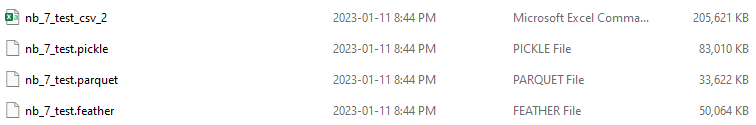

parquet took least space